## Công thức của nó là:

X_std = (X – X.min(axis=0)) / (X.max(axis=0) – X.min(axis=0))
X_scaled = X_std * (max – min) + min

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [5]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,29.132032,11.188129,11.900456,5.716139,17.063292
1,39.061775,7.208613,11.869588,14.568956,18.200422
2,43.751168,5.133966,9.640919,12.162647,29.370021
3,57.847166,14.037848,11.076628,12.354695,24.541878
4,47.253207,0.044333,13.381974,8.572141,19.128196


<AxesSubplot:ylabel='Density'>

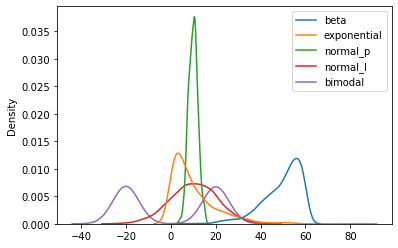

In [6]:
sns.kdeplot(data=df)

In [7]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.679727,9.983832,9.940447,10.281577,0.015830
std,8.609144,10.060884,2.065015,10.382253,20.283827
min,9.613317,0.020062,3.696827,-22.891256,-28.712034
25%,44.994572,2.695020,8.453300,3.352538,-20.044988
50%,52.014132,6.690992,9.989080,10.519343,0.041814
75%,56.182214,14.056939,11.260471,17.499791,20.089814
max,59.999727,84.096216,15.722149,41.351808,31.943782


<AxesSubplot:ylabel='Density'>

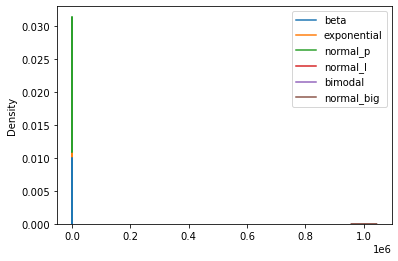

In [8]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

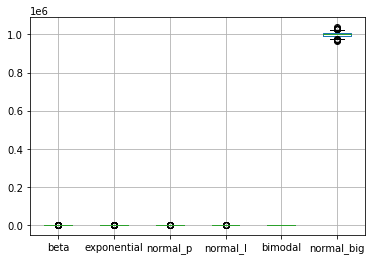

In [9]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [11]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.387381,0.132833,0.682196,0.445299,0.754673,0.685492
1,0.584452,0.085500,0.679629,0.583101,0.773421,0.553582
2,0.677521,0.060825,0.494298,0.545645,0.957568,0.501339
3,0.957279,0.166727,0.613688,0.548634,0.877969,0.640733
4,0.747025,0.000289,0.805396,0.489756,0.788716,0.479189


<AxesSubplot:ylabel='Density'>

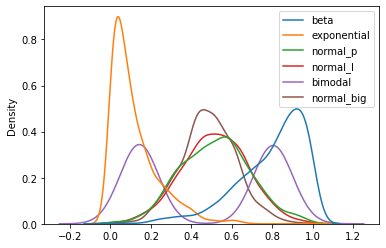

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

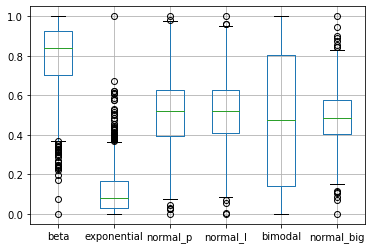

In [13]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.795183,0.118509,0.519206,0.516364,0.473621,0.486032
std,0.170862,0.119664,0.171722,0.161609,0.334409,0.136637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.702198,0.031816,0.395538,0.408508,0.142889,0.403083
50%,0.841513,0.079344,0.523250,0.520065,0.474049,0.484619
75%,0.924235,0.166954,0.628976,0.628722,0.804570,0.575410
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [16]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0000000000000002

In [17]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[9.613316670489493,
 0.020062264313922495,
 3.696827366416195,
 -22.891256130108474,
 -28.712034222426478,
 965413.539383786]

In [18]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.99972653163263,
 84.09621563697718,
 15.722149292039646,
 41.351807981471694,
 31.943782062754916,
 1037172.5279284994]

In [20]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0000000000000002, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0]